In [13]:
%matplotlib inline

import h5py
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
# import multiprocessing # plotting with multiprocessing doesn't work correctly in notebooks

from mpl_toolkits.basemap import Basemap

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v2')
from BB_downloads.HRRR_S3 import *
from BB_wx_calcs.wind import wind_uv_to_spd
from BB_data.grid_manager import pluck_point_new
from BB_MesoWest.MesoWest_STNinfo import get_MW_location_dict
from BB_basemap.draw_maps import draw_CONUS_HRRR_map

import matplotlib as mpl 
mpl.rcParams['figure.figsize'] = [8, 6]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

In [14]:
DATE = datetime(2018, 2, 1)
var = 'TMP:2 m'

variable = var.replace(':', '_').replace(' ', '_')

In [15]:
m = draw_CONUS_HRRR_map()

In [34]:
# Get OSG Percentiles
DIR = '/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/%s/' % (variable)
FILE = 'OSG_HRRR_%s_m%02d_d%02d_h%02d_f00.h5' % ((variable, DATE.month, DATE.day, DATE.hour))
with h5py.File(DIR+FILE, 'r') as f:
    OSG = f["p50"][:]

# Convert Units
if var == 'TMP:2 m' or var == 'DPT:2 m':
    OSG -= 273.15

In [23]:
# Get HRRR values
H = get_hrrr_variable(DATE, var)
# Convert Units
if var == 'TMP:2 m' or var == 'DPT:2 m':
    H['value'] -= 273.15

./temp_2018020100_f00_TMP.grib2
Oh, good, you requested a date that should be on Pando.
matched a variable 54:34772370:d=2018020100:TMP:2 m above ground:anl

range: 34772370 36022316


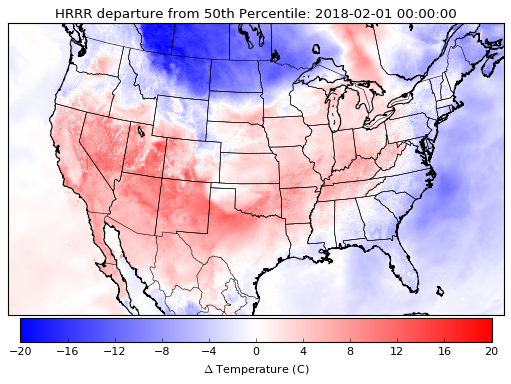

In [35]:
m.drawcoastlines()
m.drawcountries()
m.drawstates()

m.pcolormesh(H['lon'], H['lat'], H['value']-OSG, latlon=True, cmap='bwr', vmax=20, vmin=-20)
cb = plt.colorbar(orientation='horizontal', pad=0.01, shrink=.95)
cb.set_label(r'$\Delta$ Temperature (C)')\

plt.title('HRRR departure from 50th Percentile: %s' % DATE)